In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = "ignore")

In [174]:
data = pd.read_csv(r"F:\anaconda\ML SL\samridhi mam\Datasets\Datasets\glass.csv")

In [175]:
data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [177]:
data.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [178]:
#gropping Id column
data = data.drop("Id", axis = 1)
data.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


In [179]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

data has no null values

In [180]:
data["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

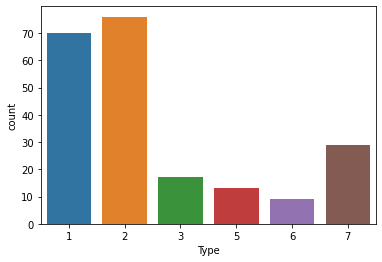

In [181]:
sns.countplot(data.Type)

look like imbalanced data set, lets continue with this data for now

In [182]:
features = data.drop("Type", axis = 1)
lable = data.Type

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Creating model with no scaling, normalization and with imbalanced dataset

In [184]:
lore = LogisticRegression()

In [185]:
X_train, X_test, y_train, y_test = train_test_split(features, lable, test_size = 0.2, random_state = 0)

In [186]:
lore.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [187]:
y_pred = lore.predict(X_test)

In [188]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [189]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = "weighted")) # weighted because output is multiclass
print(recall_score(y_test, y_pred, average = "weighted")) # weighted because output is multiclass
print(f1_score(y_test, y_pred, average = "weighted")) # weighted because output is multiclass

0.4883720930232558
0.42851605758582506
0.4883720930232558
0.43777826965713185


In [190]:
from sklearn.metrics import confusion_matrix, classification_report

In [191]:
pd.DataFrame(pd.crosstab(df.actual, df.predicted)).T

actual,1,2,3,5,6,7
predicted,,,,,,
1,7,10,3,0,0,0
2,2,8,2,2,1,0
5,0,1,0,0,0,0
7,0,0,0,0,1,6


In [192]:
confusion_matrix(y_test, y_pred)

array([[ 7,  2,  0,  0,  0,  0],
       [10,  8,  0,  1,  0,  0],
       [ 3,  2,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  6]], dtype=int64)

In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.35      0.78      0.48         9
           2       0.53      0.42      0.47        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.86      1.00      0.92         6

    accuracy                           0.49        43
   macro avg       0.29      0.37      0.31        43
weighted avg       0.43      0.49      0.44        43



### Creating model by balancing dataset by weights

In [194]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [195]:
lables = data.Type.value_counts()
lables

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [196]:
y_train

16     1
135    2
122    2
22     1
80     2
      ..
67     1
192    7
117    2
47     1
172    5
Name: Type, Length: 171, dtype: int64

In [197]:
y_train.shape

(171,)

In [198]:
y_train.shape[0]

171

In [199]:
#total lables divided by individual lebles

lst = [y_train.shape[0]/i for i in lables]
lst

[2.25,
 2.442857142857143,
 5.896551724137931,
 10.058823529411764,
 13.153846153846153,
 19.0]

In [200]:
ser = pd.Series(lst, index= lables.index)
ser

2     2.250000
1     2.442857
7     5.896552
3    10.058824
5    13.153846
6    19.000000
dtype: float64

In [201]:
[(index, ser[index]) for index in ser.index]

[(2, 2.25),
 (1, 2.442857142857143),
 (7, 5.896551724137931),
 (3, 10.058823529411764),
 (5, 13.153846153846153),
 (6, 19.0)]

In [202]:
d = dict([(index, ser[index]) for index in ser.index])
d

{2: 2.25,
 1: 2.442857142857143,
 7: 5.896551724137931,
 3: 10.058823529411764,
 5: 13.153846153846153,
 6: 19.0}

In [203]:
lore = LogisticRegression(class_weight=d)

In [204]:
lore.fit(X_train, y_train)

LogisticRegression(C=1.0,
                   class_weight={1: 2.442857142857143, 2: 2.25,
                                 3: 10.058823529411764, 5: 13.153846153846153,
                                 6: 19.0, 7: 5.896551724137931},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='warn', n_jobs=None,
                   penalty='l2', random_state=None, solver='warn', tol=0.0001,
                   verbose=0, warm_start=False)

In [205]:
y_pred = lore.predict(X_test)

In [206]:
print("accuracy \t:", accuracy_score(y_test, y_pred))
print("precision \t:", precision_score(y_test, y_pred, average = "weighted")) # weighted because output is multiclass
print("recall \t\t:", recall_score(y_test, y_pred, average = "weighted")) # weighted because output is multiclass
print("f1 score \t:",f1_score(y_test, y_pred, average = "weighted")) # weighted because output is multiclass
print("\n Confusion metrix\n", "-"*15,  "\n")
print(confusion_matrix(y_test, y_pred))
print("\n\n Classification report\n", "-"*20,"\n")
print(classification_report(y_test, y_pred))

accuracy 	: 0.5581395348837209
precision 	: 0.5637420718816067
recall 		: 0.5581395348837209
f1 score 	: 0.5242983159583

 Confusion metrix
 --------------- 

[[ 7  2  0  0  0  0]
 [10  7  0  2  0  0]
 [ 3  2  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]


 Classification report
 -------------------- 

              precision    recall  f1-score   support

           1       0.35      0.78      0.48         9
           2       0.64      0.37      0.47        19
           3       0.00      0.00      0.00         5
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         6

    accuracy                           0.56        43
   macro avg       0.58      0.69      0.60        43
weighted avg       0.56      0.56      0.52        43



### Creating model with different penalty using grid search

### Explanation

In [207]:
lore.fit(X_train, y_train)

LogisticRegression(C=1.0,
                   class_weight={1: 2.442857142857143, 2: 2.25,
                                 3: 10.058823529411764, 5: 13.153846153846153,
                                 6: 19.0, 7: 5.896551724137931},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='warn', n_jobs=None,
                   penalty='l2', random_state=None, solver='warn', tol=0.0001,
                   verbose=0, warm_start=False)

In [208]:
#l1_ratio=0.5 mean we are looking for elasticnet regression with 0.5 lasso and 0.5 ridge penalty.
#this is done to handle overfitting

#C = cost, lower the penalty the classification will not take care of 
#few noise data points during maximising the distance between classes

#if the penalty is high then it will properly classify all the classes irrespective of max distance between classes

#we will tryout different C from 10^-3 to 10^5 or so... 
#and whereever we get best performance of modle on test data that C is choosen

In [209]:
# different penalties
C = np.logspace(-3,3,20)
C

array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03])

In [210]:
#different solveres
solver = ["sag", "saga", "newton-cg", "lbfgs"]

In [211]:
param_grid = {"C" : C, "solver" : solver}

In [219]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(lore, param_grid=param_grid,scoring="f1_weighted", n_jobs=-1)

In [220]:
grid.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=54.555947811685144,
                                          class_weight={1: 2.442857142857143,
                                                        2: 2.25,
                                                        3: 10.058823529411764,
                                                        5: 13.153846153846153,
                                                        6: 19.0,
                                                        7: 5.896551724137931},
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=...
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       

In [221]:
grid.best_params_

{'C': 54.555947811685144, 'solver': 'newton-cg'}

In [222]:
#model will be trained on best parameters
lore = grid.best_estimator_

In [223]:
lore.fit(X_train, y_train)

LogisticRegression(C=54.555947811685144,
                   class_weight={1: 2.442857142857143, 2: 2.25,
                                 3: 10.058823529411764, 5: 13.153846153846153,
                                 6: 19.0, 7: 5.896551724137931},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='warn', n_jobs=None,
                   penalty='l2', random_state=None, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False)

In [224]:
y_pred = lore.predict(X_test)

In [225]:
print("accuracy \t:", accuracy_score(y_test, y_pred))
print("precision \t:", precision_score(y_test, y_pred, average = "weighted")) # weighted because output is multiclass
print("recall \t\t:", recall_score(y_test, y_pred, average = "weighted")) # weighted because output is multiclass
print("f1 score \t:",f1_score(y_test, y_pred, average = "weighted")) # weighted because output is multiclass
print("\n Confusion metrix\n", "-"*15,  "\n")
print(confusion_matrix(y_test, y_pred))
print("\n\n Classification report\n", "-"*20,"\n")
print(classification_report(y_test, y_pred))

accuracy 	: 0.4418604651162791
precision 	: 0.4563953488372093
recall 		: 0.4418604651162791
f1 score 	: 0.4160206718346253

 Confusion metrix
 --------------- 

[[ 5  2  2  0  0  0]
 [12  3  2  2  0  0]
 [ 1  3  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]


 Classification report
 -------------------- 

              precision    recall  f1-score   support

           1       0.28      0.56      0.37         9
           2       0.38      0.16      0.22        19
           3       0.20      0.20      0.20         5
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         6

    accuracy                           0.44        43
   macro avg       0.56      0.65      0.58        43
weighted avg       0.46      0.44      0.42        43

